In [1]:
import pandas as pd
import tqdm
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
df = pd.read_csv('recommendation.csv', index_col=0)

In [3]:
salary_df = pd.read_csv('salary_prediction.csv', index_col=0)

In [4]:
target = salary_df.yearly_compensation

In [5]:
from pandas.api.types import CategoricalDtype

# transforming compensation into category type and ordening the values
categ = ['0-10,000', '10-20,000', '20-30,000', '30-40,000', '40-50,000',
         '50-60,000', '60-70,000', '70-80,000', '80-90,000', '90-100,000',
         '100-125,000', '125-150,000', '150-200,000', '200-250,000', '>250,000']
cat_type = CategoricalDtype(categories=categ, ordered=True)
target = target.astype(cat_type)

In [6]:
features = df.copy()

In [7]:
def train_models(features, target, base_model, params):
    models = []
    for i, cat in tqdm.tqdm(enumerate(target.cat.categories[:-1])):
    #     print(i, cat, categ[:i + 1], categ[i + 1:])
        labels = [0] * len(categ[:i+1]) + [1] * len(categ[i + 1:])
        map = {cat: labels[j] for j, cat in enumerate(categ)}
        new_target = target.replace(map)
        mod = base_model(**params)
        mod.fit(features, new_target)
        models.append(mod)
    return models

In [80]:
models = train_models(features, target, LogisticRegression, {"random_state": 42, "solver": "lbfgs"})

14it [00:03,  3.85it/s]


In [82]:
with open('recom_models.pcl', 'wb') as f:
    pickle.dump(models, f)

In [8]:
languages = ["Python", "R", "SQL", "Bash", "Java", "Javascript",
             "Visual_Basic", "C", "Matlab", "Scala", "Julia", "Go",
             "NET", "PHP", "Ruby", "STATA", "None", "Other"]

In [9]:
frameworks = ["Scikit_Learn", "TensorFlow", "Keras", "PyTorch", "Spark", "H20",
              "Fastai", "Mxnet", "Caret", "Xgboost", "mlr", "Prophet", "randomForest",
              "lightgbm", "catboost", "CNTK", "Caffe", "None", "Other"]

In [10]:
courses = ["Udacity", "Coursera", "edX", "DataCamp", "DataQuest", "Kaggle_learn",
           "Fast_AI", "developers_google", "Udemy", "TheSchool_AI", "Online_University_courses",
           "None", "Other"]

In [11]:
sources = ['Twitter', 'Hacker_news', 'R_machine_learning', 'Kaggle_forum',
           'Fastai', 'SirajRaval', 'DataTau', 'Linear_Digression_podcast',
           'Cloud_AI_adventures', 'FiveThirtyEight', 'ArXiv', 'Journal_publication',
           'FastMLBlog', 'KDnuggets', 'OReilly_data', 'Partially_derivative_podcast',
             'Data_Skeptic_podcast', 'Medium_Blog', 'Torwards_data_science',
           'Analytics_Vidhya', "None", 'Other']

In [12]:
cols = ['Q16_Python', 'Q16_R', 'Q16_SQL', 'Q16_Bash', 'Q16_Java',
                       'Q16_Javascript', 'Q16_Visual_Basic', 'Q16_C', 'Q16_Matlab',
                       'Q16_Scala', 'Q16_Julia', 'Q16_Go', 'Q16_NET', 'Q16_PHP', 'Q16_Ruby',
                       'Q16_STATA', 'Q16_None', 'Q16_Other', 'Q19_Scikit_Learn',
                       'Q19_TensorFlow', 'Q19_Keras', 'Q19_PyTorch', 'Q19_Spark', 'Q19_H20',
                       'Q19_Fastai', 'Q19_Mxnet', 'Q19_Caret', 'Q19_Xgboost', 'Q19_mlr',
                       'Q19_Prophet', 'Q19_randomForest', 'Q19_lightgbm', 'Q19_catboost',
                       'Q19_CNTK', 'Q19_Caffe', 'Q19_None', 'Q19_Other', 'Q38_Twitter',
                       'Q38_Hacker_news', 'Q38_R_machine_learning', 'Q38_Kaggle_forum',
                       'Q38_Fastai', 'Q38_SirajRaval', 'Q38_DataTau',
                       'Q38_Linear_Digression_podcast', 'Q38_Cloud_AI_adventures',
                       'Q38_FiveThirtyEight', 'Q38_ArXiv', 'Q38_Journal_publication',
                       'Q38_FastMLBlog', 'Q38_KDnuggets', 'Q38_OReilly_data',
                       'Q38_Partially_derivative_podcast', 'Q38_Data_Skeptic_podcast',
                       'Q38_Medium_Blog', 'Q38_Torwards_data_science', 'Q38_Analytics_Vidhya',
                       'Q38_Other', 'Q38_None', 'Q36_Udacity', 'Q36_Coursera', 'Q36_edX',
                       'Q36_DataCamp', 'Q36_DataQuest', 'Q36_Kaggle_learn', 'Q36_Fast_AI',
                       'Q36_developers_google', 'Q36_Udemy', 'Q36_TheSchool_AI',
                       'Q36_Online_University_courses', 'Q36_None', 'Q36_Other']


In [83]:
import pickle
from functools import reduce
import numpy as np
import pandas as pd


class RecommenderModel:
    def __init__(self, path='recom_model.pcl'):
        self.models = None
        with open(path, 'rb') as f:
            self.models = pickle.load(f)
        self.prod = lambda x, y: x * y
        self.cols = ['Q16_Python', 'Q16_R', 'Q16_SQL', 'Q16_Bash', 'Q16_Java',
                       'Q16_Javascript', 'Q16_Visual_Basic', 'Q16_C', 'Q16_Matlab',
                       'Q16_Scala', 'Q16_Julia', 'Q16_Go', 'Q16_NET', 'Q16_PHP', 'Q16_Ruby',
                       'Q16_STATA', 'Q16_None', 'Q16_Other', 'Q19_Scikit_Learn',
                       'Q19_TensorFlow', 'Q19_Keras', 'Q19_PyTorch', 'Q19_Spark', 'Q19_H20',
                       'Q19_Fastai', 'Q19_Mxnet', 'Q19_Caret', 'Q19_Xgboost', 'Q19_mlr',
                       'Q19_Prophet', 'Q19_randomForest', 'Q19_lightgbm', 'Q19_catboost',
                       'Q19_CNTK', 'Q19_Caffe', 'Q19_None', 'Q19_Other', 'Q38_Twitter',
                       'Q38_Hacker_news', 'Q38_R_machine_learning', 'Q38_Kaggle_forum',
                       'Q38_Fastai', 'Q38_SirajRaval', 'Q38_DataTau',
                       'Q38_Linear_Digression_podcast', 'Q38_Cloud_AI_adventures',
                       'Q38_FiveThirtyEight', 'Q38_ArXiv', 'Q38_Journal_publication',
                       'Q38_FastMLBlog', 'Q38_KDnuggets', 'Q38_OReilly_data',
                       'Q38_Partially_derivative_podcast', 'Q38_Data_Skeptic_podcast',
                       'Q38_Medium_Blog', 'Q38_Torwards_data_science', 'Q38_Analytics_Vidhya',
                       'Q38_Other', 'Q38_None', 'Q36_Udacity', 'Q36_Coursera', 'Q36_edX',
                       'Q36_DataCamp', 'Q36_DataQuest', 'Q36_Kaggle_learn', 'Q36_Fast_AI',
                       'Q36_developers_google', 'Q36_Udemy', 'Q36_TheSchool_AI',
                       'Q36_Online_University_courses', 'Q36_None', 'Q36_Other']
        self.n_cols = len(self.cols)

        self.languages = ["Python", "R", "SQL", "Bash", "Java", "Javascript",
                         "Visual_Basic", "C", "Matlab", "Scala", "Julia", "Go",
                         "NET", "PHP", "Ruby", "STATA", "None", "Other"]
        self.lang_map = {l: 'Q16_' + l for l in self.languages}
        
        self.frameworks = ["Scikit_Learn", "TensorFlow", "Keras", "PyTorch", "Spark", "H20",
              "Fastai", "Mxnet", "Caret", "Xgboost", "mlr", "Prophet", "randomForest",
              "lightgbm", "catboost", "CNTK", "Caffe", "None", "Other"]
        
        self.framework_map = {f: 'Q19_' + f for f in self.frameworks}
        
        self.courses = ["Udacity", "Coursera", "edX", "DataCamp", "DataQuest", "Kaggle_learn",
           "Fast_AI", "developers_google", "Udemy", "TheSchool_AI", "Online_University_courses",
           "None", "Other"]
        
        self.course_map = {c: 'Q36_' + c for c in self.courses}
        
        self.sources = ['Twitter', 'Hacker_news', 'R_machine_learning', 'Kaggle_forum',
           'Fastai', 'SirajRaval', 'DataTau', 'Linear_Digression_podcast',
           'Cloud_AI_adventures', 'FiveThirtyEight', 'ArXiv', 'Journal_publication',
           'FastMLBlog', 'KDnuggets', 'OReilly_data', 'Partially_derivative_podcast',
             'Data_Skeptic_podcast', 'Medium_Blog', 'Torwards_data_science',
           'Analytics_Vidhya', "None", 'Other']
        
        self.source_map = {s: 'Q38_' + s for s in self.sources}

    def form_input_to_sample(self, languages=[], frameworks=[], courses=[], sources=[]):
        sample = pd.DataFrame(np.zeros((1, self.n_cols)), columns=self.cols)

        for v in languages:
            sample['Q16_' + v] = 1
        for v in frameworks:
            sample['Q19_' + v] = 1
        for v in courses:
            sample['Q36_' + v] = 1
        for v in sources:
            sample['Q38_' + v] = 1
        return sample

    def predict(self, sample):
        """
        Given list of binary classifiers and a sample, predict the most probable category index and the distribution
        """
        binary_probabilities = [mod.predict_proba(sample) for mod in self.models]
        neg_probs = [p[0][0] for p in binary_probabilities]
        pos_probs = [p[0][1] for p in binary_probabilities]
        bin_probabilities = []
        for i in range(len(self.models)):
            bin_prob = [p for p in pos_probs[:i]] + [neg_probs[i]]
            reduced = reduce(self.prod, bin_prob)
            bin_probabilities.append(reduced)
        bin_probabilities.append(reduce(self.prod, pos_probs))
        return np.argmax(bin_probabilities), bin_probabilities
    
    def summarize_distribution(self, probs):
        """ 1 - AUC of empirical cumulative distribution """
        return 1 - (np.cumsum(probs).sum() / len(probs))

    def get_recommendations(self, base_sample, top_n=None):
        base_pred, base_distr = self.predict(base_sample)
        base_sum = self.summarize_distribution(base_distr)

        pairs = []

        for c in self.languages:
            if c in ["None", "Other"]:
                continue
            if base_sample[self.lang_map[c]].values == 0:
                candidate = base_sample.copy()
                candidate[self.lang_map[c]] = 1
                _, dist = self.predict(candidate)
                dist_sum = self.summarize_distribution(dist)
                relative_change = (dist_sum - base_sum) / base_sum
                pairs.append((c, relative_change))

        for c in self.frameworks:
            if c in ["None", "Other"]:
                continue
            if base_sample[self.framework_map[c]].values == 0:
                candidate = base_sample.copy()
                candidate[self.framework_map[c]] = 1
                _, dist = self.predict(candidate)
                dist_sum = self.summarize_distribution(dist)
                relative_change = (dist_sum - base_sum) / base_sum
                pairs.append((c, relative_change))     


        for c in self.courses:
            if c in ["None", "Other"]:  # We shouldn't even evaluate those options
                continue
            if base_sample[self.course_map[c]].values == 0:
                candidate = base_sample.copy()
                candidate[self.course_map[c]] = 1
                _, dist = self.predict(candidate)
                dist_sum = self.summarize_distribution(dist)
                relative_change = (dist_sum - base_sum) / base_sum
                pairs.append((c, relative_change))

        for c in self.sources:
            if c in ["None", "Other"]:
                continue
            if base_sample[self.source_map[c]].values == 0:
                candidate = base_sample.copy()
                candidate[self.source_map[c]] = 1
                _, dist = self.predict(candidate)
                dist_sum = self.summarize_distribution(dist)
                relative_change = (dist_sum - base_sum) / base_sum
                pairs.append((c, relative_change))  

        ordered = sorted(pairs, key=lambda x:x[1], reverse=True)
        if top_n is None:
            return ordered
        else:
            return ordered[:top_n]

In [84]:
model = RecommenderModel('recom_models.pcl')

In [85]:
sample = model.form_input_to_sample(languages, [], ['Udemy'], ['ArXiv'])

In [31]:
def summarize_distribution(probs):
    """ 1 - AUC of empirical cumulative distribution """
    return 1 - (np.cumsum(probs).sum() / len(probs))

In [32]:
summarize_distribution(model.predict(sample)[1])

0.3049887478792853

In [39]:
sample = model.form_input_to_sample([], [], [], [])
summarize_distribution(model.predict(sample)[1])

0.06799592341284133

In [57]:
base_sample = model.form_input_to_sample(languages, [], ['Udemy'], ['ArXiv'])
base_pred, base_distr = model.predict(base_sample)
base_sum = summarize_distribution(base_distr)

In [71]:
pairs = []

for c in model.languages:
    if c in ["None", "Other"]:
        continue
    if base_sample[model.lang_map[c]].values == 0:
        candidate = base_sample.copy()
        candidate[model.lang_map[c]] = 1
        _, dist = model.predict(candidate)
        dist_sum = summarize_distribution(dist)
        relative_change = (dist_sum - base_sum) / base_sum
        pairs.append((c, relative_change))

for c in model.frameworks:
    if c in ["None", "Other"]:
        continue
    if base_sample[model.framework_map[c]].values == 0:
        candidate = base_sample.copy()
        candidate[model.framework_map[c]] = 1
        _, dist = model.predict(candidate)
        dist_sum = summarize_distribution(dist)
        relative_change = (dist_sum - base_sum) / base_sum
        pairs.append((c, relative_change))     
    

for c in model.courses:
    if c in ["None", "Other"]:  # We shouldn't even evaluate those options
        continue
    if base_sample[model.course_map[c]].values == 0:
        candidate = base_sample.copy()
        candidate[model.course_map[c]] = 1
        _, dist = model.predict(candidate)
        dist_sum = summarize_distribution(dist)
        relative_change = (dist_sum - base_sum) / base_sum
        pairs.append((c, relative_change))

for c in model.sources:
    if c in ["None", "Other"]:
        continue
    if base_sample[model.source_map[c]].values == 0:
        candidate = base_sample.copy()
        candidate[model.source_map[c]] = 1
        _, dist = model.predict(candidate)
        dist_sum = summarize_distribution(dist)
        relative_change = (dist_sum - base_sum) / base_sum
        pairs.append((c, relative_change))  

In [76]:
ordered_recommendations = sorted(pairs, key=lambda x:x[1], reverse=True)

In [78]:
def get_recommendations(base_sample, top_n=None):
    base_pred, base_distr = model.predict(base_sample)
    base_sum = summarize_distribution(base_distr)
    
    pairs = []

    for c in model.languages:
        if c in ["None", "Other"]:
            continue
        if base_sample[model.lang_map[c]].values == 0:
            candidate = base_sample.copy()
            candidate[model.lang_map[c]] = 1
            _, dist = model.predict(candidate)
            dist_sum = summarize_distribution(dist)
            relative_change = (dist_sum - base_sum) / base_sum
            pairs.append((c, relative_change))

    for c in model.frameworks:
        if c in ["None", "Other"]:
            continue
        if base_sample[model.framework_map[c]].values == 0:
            candidate = base_sample.copy()
            candidate[model.framework_map[c]] = 1
            _, dist = model.predict(candidate)
            dist_sum = summarize_distribution(dist)
            relative_change = (dist_sum - base_sum) / base_sum
            pairs.append((c, relative_change))     


    for c in model.courses:
        if c in ["None", "Other"]:  # We shouldn't even evaluate those options
            continue
        if base_sample[model.course_map[c]].values == 0:
            candidate = base_sample.copy()
            candidate[model.course_map[c]] = 1
            _, dist = model.predict(candidate)
            dist_sum = summarize_distribution(dist)
            relative_change = (dist_sum - base_sum) / base_sum
            pairs.append((c, relative_change))

    for c in model.sources:
        if c in ["None", "Other"]:
            continue
        if base_sample[model.source_map[c]].values == 0:
            candidate = base_sample.copy()
            candidate[model.source_map[c]] = 1
            _, dist = model.predict(candidate)
            dist_sum = summarize_distribution(dist)
            relative_change = (dist_sum - base_sum) / base_sum
            pairs.append((c, relative_change))  
    
    ordered = sorted(pairs, key=lambda x:x[1], reverse=True)
    if top_n is None:
        return ordered
    else:
        return ordered[:top_n]

In [82]:
get_recommendations(model.form_input_to_sample([], [], [], []))

[('FiveThirtyEight', 1.2990127923009935),
 ('Bash', 0.5644328391090512),
 ('Visual_Basic', 0.4591255713285377),
 ('Mxnet', 0.41048383321489534),
 ('SQL', 0.3850083760095137),
 ('Go', 0.3713216031140435),
 ('Prophet', 0.3623138749507472),
 ('Caret', 0.30980489888308105),
 ('Spark', 0.307121338845366),
 ('Linear_Digression_podcast', 0.3066419051307281),
 ('Xgboost', 0.29335959757152075),
 ('H20', 0.27326618334971664),
 ('Scala', 0.2591352315749298),
 ('ArXiv', 0.2373350047109161),
 ('OReilly_data', 0.21771520641213646),
 ('Ruby', 0.20879888916077757),
 ('Data_Skeptic_podcast', 0.20601271422457923),
 ('Partially_derivative_podcast', 0.19398755615193744),
 ('STATA', 0.18161096999887244),
 ('Coursera', 0.1805978095936583),
 ('CNTK', 0.15588124327588782),
 ('Udacity', 0.13463635794055487),
 ('Journal_publication', 0.12986807490795965),
 ('NET', 0.1267893755731145),
 ('Hacker_news', 0.1260518782208932),
 ('R', 0.12231038743519142),
 ('KDnuggets', 0.1169068710818734),
 ('TensorFlow', 0.1165027

0.9134230901127919


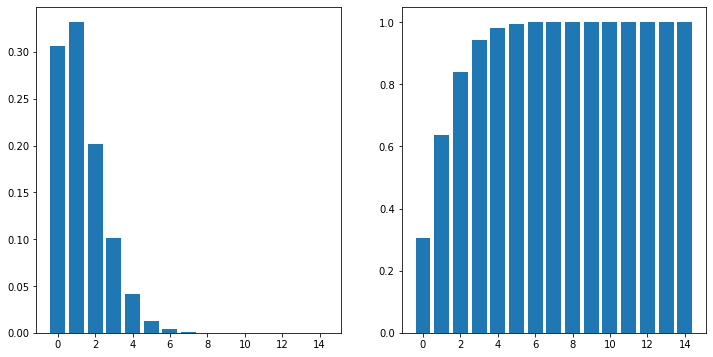

In [102]:
idx, probs = model.predict(model.form_input_to_sample([], ['H20'], [], []))
import matplotlib.pyplot as plt
_, ax = plt.subplots(ncols=2, figsize=(12, 6))
cum_probs = np.cumsum(probs)
print(cum_probs.sum() / len(probs))
ax[0].bar(np.arange(len(probs)), probs);
ax[1].bar(np.arange(len(probs)), cum_probs);

In [103]:
probs

[0.30584996154092803,
 0.33178995432793784,
 0.20216573650574846,
 0.10153065659050849,
 0.04127927384092381,
 0.012767775548829057,
 0.0035714084440662663,
 0.0008443562690562847,
 0.0001672128435119893,
 2.938435914258717e-05,
 3.929333452674537e-06,
 3.27354011513278e-07,
 2.2226950118953123e-08,
 7.99962672575207e-10,
 1.497022300709256e-11]

0.7427674368781291


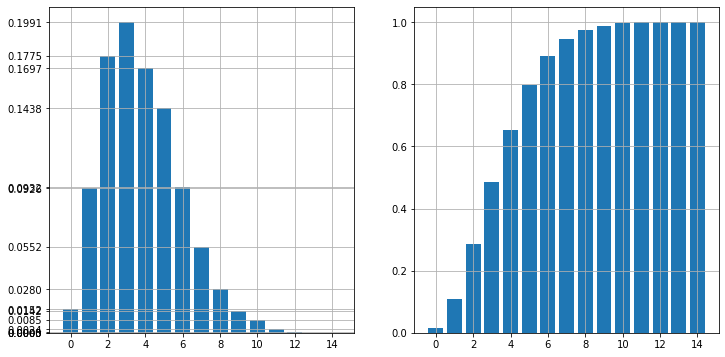

In [104]:
import matplotlib.pyplot as plt
sample2 = model.form_input_to_sample([], model.frameworks, [], [])
idx, probs = model.predict(sample2)
cum_probs = np.cumsum(probs)
_, ax = plt.subplots(ncols=2, figsize=(12, 6))
print(cum_probs.sum() / len(probs))
ax[0].bar(np.arange(len(probs)), probs);
ax[0].set_yticks(probs)
ax[0].grid()
ax[1].bar(np.arange(len(probs)), cum_probs);
ax[1].grid()

In [105]:
probs

[0.015185450010638313,
 0.09260013567082466,
 0.1775048958083291,
 0.19907101068415434,
 0.16970297859498457,
 0.1438439611786965,
 0.09324124140200239,
 0.055163762126096014,
 0.028041741123212022,
 0.014206153838431306,
 0.00850596923589099,
 0.002419552981589823,
 0.0004955558743898112,
 1.7055851288377178e-05,
 5.356194717825984e-07]